**This Notebook contains Steps to Refernce the trained Model and pushing it to the Snowflake Model Registry**




## Step 1 : Importing the necessary libraries


In [ ]:
from snowflake.snowpark.session import Session

from snowflake.ml.registry import registry

import pandas as pd

from snowflake.snowpark import Session
from snowflake.snowpark.version import VERSION
from dotenv import load_dotenv
from snowflake.ml.registry import Registry
from snowflake.ml.model import custom_model
from snowflake.ml.model import model_signature
import json 
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os
from transformers import pipeline

load_dotenv()


## Step 2 : Referencing the Custom trained Model and registering the model to Snowflake

In [ ]:
model_path  =  "Azar-J/question-classifier"

tokenizer =  AutoTokenizer.from_pretrained(model_path)

id2label = {0:"Insights",1:"Data"}
label2id = {1:"Data",0:"Insights"}

model =  AutoModelForSequenceClassification.from_pretrained(model_path,num_labels=2,id2label=id2label,label2id=label2id,)


classifier = pipeline("text-classification",model=model,tokenizer=tokenizer)



## Step 3: Connecting to the Snowflake

In [43]:
account =  os.getenv('ACCOUNT')
user =  os.getenv('USER')
pwd =  os.getenv('PASSWORD')
role = os.getenv('ROLE')

connection_parameters = {
    "account": account,
    "user": user,
    "password": pwd,
    "role": role,
    "warehouse": "TRIAL_WAREHOUSE",
    "database": "CUSTOMER",
    "schema": "PUBLIC"
}

session = Session.builder.configs(connection_parameters).create()


## Step 4: Register the Model to Snowflake

In [ ]:

snowml_registry = Registry(session)


# Register the model to Snowflake
snow_model = snowml_registry.log_model(
    classifier, 
    model_name='classifier_model', 
    conda_dependencies=['tokenizers','transformers','pytorch']
    )

## Step 5 : Testing the registered model from snowflake

In [ ]:
results = snow_model.run(pd.DataFrame(
        [
            ["What are the latest sales insights?", ""],
            ["Retrieve data from Snowflake.", ""],
        ]
    )
)

print(results)

### Now you can reference the model in snowflake for your custom Question and Check how the Model works for different inputs , we have given a small example below in which it recognizes the intent of the question and give a proper response based on our trained data.






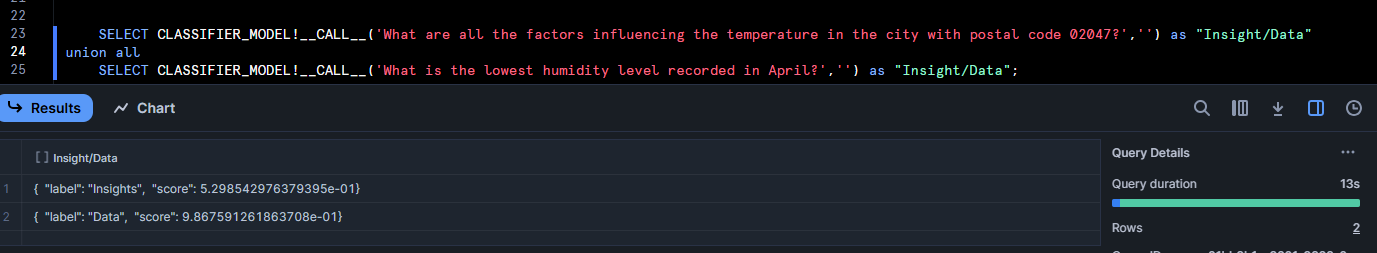